# ------------------------------- IBM Data Science Capstone -------------------------------
# Battle Of The Neighborhoods

## Choosing the best vacation spot: _Paris_, _Dubai_, _Kuala Lumpur_ and _New York_

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
import requests
from pandas.io.json import json_normalize


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import folium

print('Libraries imported.')

Libraries imported.


#### Adding Credentials For FourSquare API

In [2]:
CLIENT_ID = 'I1IYTV342FAQKVNJ4ABZI45KP3BNTGLWRV11E5IT3I33JI20' # your Foursquare ID
CLIENT_SECRET = 'NWN0ODIB21P2H5RFQZ30KLJ115WYXQEUB2SO4W4Z5MGG2MKV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
RADIUS = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I1IYTV342FAQKVNJ4ABZI45KP3BNTGLWRV11E5IT3I33JI20
CLIENT_SECRET:NWN0ODIB21P2H5RFQZ30KLJ115WYXQEUB2SO4W4Z5MGG2MKV


#### Getting the Cordinates for the Cities

In [3]:
address = 'New York'

geolocator = Nominatim(user_agent="foursquare_agent")
ny_location = geolocator.geocode(address)
ny_latitude = ny_location.latitude
ny_longitude = ny_location.longitude
print(ny_latitude, ny_longitude)

40.7127281 -74.0060152


In [4]:
address = 'Kuala Lumpur, Malaysia'

geolocator = Nominatim(user_agent="foursquare_agent")
kl_location = geolocator.geocode(address)
kl_latitude = kl_location.latitude
kl_longitude = kl_location.longitude
print(kl_latitude, kl_longitude)

3.1516964 101.6942371


In [5]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="foursquare_agent")
p_location = geolocator.geocode(address)
p_latitude = p_location.latitude
p_longitude = p_location.longitude
print(p_latitude, p_longitude)

48.8566969 2.3514616


In [6]:
address = 'Dubai, United Arab Emirates'

geolocator = Nominatim(user_agent="foursquare_agent")
d_location = geolocator.geocode(address)
d_latitude = d_location.latitude
d_longitude = d_location.longitude
print(d_latitude, d_longitude)

25.0657 55.1713


#### Get Request and Examining the Results

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, p_latitude, p_longitude, VERSION, RADIUS, LIMIT)

In [8]:
paris_dict = requests.get(url).json()
print('Total Number of Venues in Paris: ',len(paris_dict['response']['venues']))

Total Number of Venues in Paris:  50


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, d_latitude, d_longitude, VERSION, RADIUS, LIMIT)

In [10]:
dubai_dict = requests.get(url).json()
print('Total Number of Venues in Dubai: ',len(dubai_dict['response']['venues']))

Total Number of Venues in Dubai:  118


In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, kl_latitude, kl_longitude, VERSION, RADIUS, LIMIT)

In [12]:
kl_dict = requests.get(url).json()
print('Total Number of Venues in Kuala Lumpur: ',len(kl_dict['response']['venues']))

Total Number of Venues in Kuala Lumpur:  125


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ny_latitude, ny_longitude, VERSION, RADIUS, LIMIT)

In [14]:
ny_dict = requests.get(url).json()
print('Total Number of Venues in New York: ',len(ny_dict['response']['venues']))

Total Number of Venues in New York:  123


In [50]:
map_1= folium.Map(location=[p_latitude, p_longitude], zoom_start=13)
map_1

In [51]:
map_1= folium.Map(location=[d_latitude, d_longitude], zoom_start=13)
map_1

In [52]:
map_1= folium.Map(location=[kl_latitude, kl_longitude], zoom_start=13)
map_1

In [53]:
map_1= folium.Map(location=[ny_latitude, ny_longitude], zoom_start=13)
map_1

#### Getting relevant JSON and transforming to Pandas DataFrame

In [15]:
venues = kl_dict['response']['venues']
kuala_df = json_normalize(venues)
kuala_df.head(12)

id                                   name  \
0   4c73295213228cfa74312d65                           Dataran DBKL   
1   4c75ac31ff1fb60ca9faf6a7                          Menara DBKL 1   
2   4ec4f9b9e300e6894f206ae2  Dewan Bandaraya Kuala Lumpur Menara 2   
3   4d65cd0a56746dcbae433fff                         Cafeteria DBKL   
4   4e630717a80951b318c6251d                             JKPB, DBKL   
5   4ffcd2d7e4b06453d6273102            Pejabat Ketua Pengarah DBKL   
6   4e81143edab4137206f8f572                 Taska PUSPANITA DBKL 1   
7   55dbf969498e2ac297e1b489              The Foodies Coffee & Food   
8   4e6ead85c65b6d433a9b487e                          Secret Recipe   
9   4fe99bb1e4b0658a7cd6db06            Surau Tingkat 3 Menara DBKL   
10  59bf4da00c9f3164ce7829fd                               'Q' Cafe   
11  4e77f55518387f86596a5ab2                      Meeting Room JKPB   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d163941735', 'name': 'P...  v-1585689957    False   
1   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
2   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
3   [{'id': '4bf58dd8d48988d142941735', 'name': 'A...  v-1585689957    False   
4   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
5   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
6   [{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...  v-1585689957    False   
7   [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...  v-1585689957    False   
8   [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...  v-1585689957    False   
9   [{'id': '4bf58dd8d48988d138941735', 'name': 'M...  v-1585689957    False   
10  [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...  v-1585689957    False   
11  [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   

                                   location.address  location.lat  \
0                                       Menara DBKL      3.151427   
1                                   Jalan Raja Laut      3.152314   
2                 Bangunan DBKL Menara 2, Tingkat 6      3.151609   
3                              Tkt 2, Menara DBKL 1      3.152154   
4   Jabatan Kejuruteraan Awam & Pengangkutan Bandar      3.152191   
5                                               NaN      3.151852   
6                           Tingkat 2,Menara DBKL 1      3.151490   
7                                 LG, Menara DBKL 1      3.151916   
8                                     Menara DBKL 1      3.152181   
9                                               NaN      3.151952   
10                                    Menara DBKL 1      3.152207   
11                                   Level 17, JKPB      3.152165   

    location.lng                            location.labeledLatLngs  \
0     101.694462  [{'label': 'display', 'lat': 3.151427172961877...   
1     101.694662  [{'label': 'display', 'lat': 3.152314298073572...   
2     101.694551  [{'label': 'display', 'lat': 3.15160866153506,...   
3     101.694922  [{'label': 'display', 'lat': 3.152153558414952...   
4     101.694970  [{'label': 'display', 'lat': 3.152190889805493...   
5     101.694143  [{'label': 'display', 'lat': 3.151852, 'lng': ...   
6     101.694268  [{'label': 'display', 'lat': 3.151489964089715...   
7     101.694533  [{'label': 'display', 'lat': 3.151916429653174...   
8     101.694910  [{'label': 'display', 'lat': 3.152180852766849...   
9     101.694001  [{'label': 'display', 'lat': 3.151951765063616...   
10    101.695007  [{'label': 'display', 'lat': 3.152206580488561...   
11    101.694929  [{'label': 'display', 'lat': 3.152164705849859...   

    location.distance location.cc             location.city  \
0                  39          MY              Kuala Lumpur   
1                  83          MY              Kuala Lumpur   
2                  36          MY              Kua

In [16]:
venues = ny_dict['response']['venues']
newyork_df = json_normalize(venues)
newyork_df.head(12)

id                                  name  \
0   58f0cd8db1ec13241266420a                              New York   
1   4a676321f964a52051c91fe3                    New York City Hall   
2   4b475390f964a520f12e26e3                    Mary's Coffee Shop   
3   4b57b0dff964a520293c28e3          MTA Subway - City Hall (R/W)   
4   4b79a5e8f964a52037082fe3                          NY Gift Shop   
5   3fd66200f964a520d8f11ee3                        City Hall Park   
6   51a4bc7c498e469047be66d6            City Hall Council Chambers   
7   5ae3d3db3ba767002cf97a85        El Mexicano Restaurante & Cafe   
8   4dd77d22b3adc64ae076925d                     St comunity beach   
9   51b3b7da498efda7cefb2660           Dahlia's Mexican Restaurant   
10  4e31861d7d8b9b256bcc43a8                     June's Fruit Cart   
11  4b76dba7f964a520b4642ee3  NY State Legislative Office Building   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1585689957    False   
1   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
2   [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...  v-1585689957    False   
3   [{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...  v-1585689957    False   
4   [{'id': '4bf58dd8d48988d128951735', 'name': 'G...  v-1585689957    False   
5   [{'id': '4bf58dd8d48988d163941735', 'name': 'P...  v-1585689957    False   
6   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689957    False   
7   [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...  v-1585689957    False   
8   [{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...  v-1585689957    False   
9   [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...  v-1585689957    False   
10  [{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...  v-1585689957    False   
11  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...  v-1585689957    False   

      location.address  location.lat  location.lng  \
0         230 Broadway     40.712784    -74.005940   
1       260 E Broadway     40.712659    -74.005880   
2   25-15 Queens Plz N     40.712786    -74.005944   
3           Warren St.     40.713394    -74.006934   
4         234 Canal St     40.712733    -74.005978   
5          17 Park Row     40.712415    -74.006724   
6            City Hall     40.712736    -74.005472   
7          142 9th Ave     40.675417    -74.000486   
8             new york     40.712781    -74.005944   
9     353 Greenwich St     40.718754    -74.010337   
10        60 Centre St     40.712786    -74.005944   
11        250 Broadway     40.712786    -74.005944   

                              location.labeledLatLngs  location.distance  \
0   [{'label': 'display', 'lat': 40.712784, 'lng':...                  8   
1                                                 NaN                 13   
2   [{'label': 'display', 'lat': 40.71278567220636...                  8   
3   [{'label': 'display', 'lat': 40.71339431394821...                107   
4   [{'label': 'display', 'lat': 40.71273261495395...                  3   
5                                                 NaN                 69   
6   [{'label': 'display', 'lat': 40.71273609783686...                 45   
7   [{'label': 'display', 'lat': 40.675417, 'lng':...               4179   
8   [{'label': 'display', 'lat': 40.71278084415942...                  8   
9   [{'label': 'display', 'lat': 40.71875385948834...                763   
10  [{'label': 'display', 'lat': 40.71278567220636...                  8   
11  [{'label': 'display', 'lat': 40.71278567220636...                  8   

   location.postalCode location.cc     location.city location.state  \
0                10007          US          New York             NY   
1                10002          US          New York             NY   
2                11101          US  Long Island City             NY   
3                10038          US          New York             NY   
4                10013     

In [17]:
venues = paris_dict['response']['venues']
paris_df = json_normalize(venues)
paris_df.head(12)

id  \
0   4adcda09f964a520e53321e3   
1   4bf41231e5eba59334341f90   
2   4d99bbbadaec224bd286653e   
3   4e94765b2c5b36f3226fa006   
4   4c2f66a6213c2d7fe1be305d   
5   4c7057399c6d6dcbf269d27a   
6   569a48a4498edb460ac5a219   
7   58d800df9435a979b8a645fa   
8   4b8ccf47f964a520c7dd32e3   
9   4bb08355f964a52025493ce3   
10  4adcda09f964a520e83321e3   
11  4ea16e29775b5c3e82b328a1   

                                                 name  \
0   Hôtel de Ville de Paris (Hôtel de ville de Paris)   
1   Place de l'Hôtel de Ville – Esplanade de la Li...   
2                                       The Body Shop   
3                                             Tuvalet   
4                                     Pont Notre-Dame   
5                                            La Seine   
6                                Artisan de la Truffe   
7                       Berges de Seine – Rive droite   
8                         Métro Hôtel de Ville [1,11]   
9                                            La Poste   
10                     Cathédrale Notre-Dame de Paris   
11               Brigade de la Protection des Mineurs   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1585689955    False   
1   [{'id': '4bf58dd8d48988d164941735', 'name': 'P...  v-1585689955    False   
2   [{'id': '4bf58dd8d48988d10c951735', 'name': 'C...  v-1585689955    False   
3   [{'id': '4bf58dd8d48988d148941735', 'name': 'D...  v-1585689955    False   
4   [{'id': '4bf58dd8d48988d1df941735', 'name': 'B...  v-1585689955    False   
5   [{'id': '4eb1d4dd4b900d56c88a45fd', 'name': 'R...  v-1585689955    False   
6   [{'id': '4bf58dd8d48988d10c941735', 'name': 'F...  v-1585689955    False   
7   [{'id': '52e81612bcbc57f1066b7a25', 'name': 'P...  v-1585689955    False   
8   [{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...  v-1585689955    False   
9   [{'id': '4bf58dd8d48988d172941735', 'name': 'P...  v-1585689955    False   
10  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1585689955    False   
11  [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1585689955    False   

                                     location.address  \
0                         4 place de l'Hôtel de Ville   
1                           Place de l'Hôtel de Ville   
2                                    68 rue de Rivoli   
3                                               Paris   
4                                     Pont Notre-Dame   
5                                            La Seine   
6                                    52 rue de Rivoli   
7   De la passerelle Léopold-Sédar-Senghor au port...   
8                           Place de l'Hôtel de Ville   
9                           Place de l'Hôtel de Ville   
10                       6 place du parvis Notre-Dame   
11                                                NaN   

          location.crossStreet  location.lat  location.lng  \
0   Esplanade de la Libération     48.856478      2.352372   
1                          NaN     48.856925      2.351412   
2                          NaN     48.857507      2.352118   
3                          NaN     48.856613      2.352222   
4                          NaN     48.856174      2.348607   
5                          NaN     48.858185      2.339639   
6     3ème étage du BHV Marais     48.857297      2.352454   
7                          NaN     48.855131      2.352289   
8                          NaN     48.857353      2.351761   
9                Rue de Rivoli     48.857140      2.351721   
10          Place Jean-Paul II     48.853124      2.349561   
11                         NaN     48.856531      2.351095   

                              location.labeledLatLngs  location.distance  \
0   [{'label': 'display', 'lat': 48.85647757431556...                 71   
1                                                 NaN                 25   
2   [{'label': 'display', 'lat': 48.8575065424649

In [18]:
venues = dubai_dict['response']['venues']
dubai_df = json_normalize(venues)
dubai_df.head(12)

id                                   name  \
0   4f3c9976754a0129f4716f88                McDonald's (ماكدونالدز)   
1   4ebc5e1f239c238b387deee8                              Pinkberry   
2   5baa72d095d986002bed01a5                    Desert Safari Dubai   
3   5356ce7011d2f402bd245b96                                Jacob's   
4   5960c628f79faa623fd39bb8  Burjeel Hospital for Advanced Surgery   
5   4d89113a1508a143cae9051e                             Beit feras   
6   4e8f34aad3e3187fc268af1f                              Starbucks   
7   4e5e352218a8c46e0831e82b                                 Gateux   
8   5c34a1d5610f04002c737c35                    Mimosa Beauty Salon   
9   4cc150a7873c236ad500b823              Masjid Al Sammad (Mosque)   
10  4ca42e195720b1f7362c38ef                   Dubai British School   
11  4dce778dfa7664b7c6a7c1d4                                 Tavola   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d16e941735', 'name': 'F...  v-1585689955    False   
1   [{'id': '512e7cae91d4cbb4e5efe0af', 'name': 'F...  v-1585689955    False   
2   [{'id': '56aa371be4b08b9a8d573520', 'name': 'T...  v-1585689955    False   
3                                                  []  v-1585689955    False   
4   [{'id': '56aa371be4b08b9a8d573517', 'name': 'B...  v-1585689955    False   
5                                                  []  v-1585689955    False   
6   [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...  v-1585689955    False   
7   [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...  v-1585689955    False   
8   [{'id': '4bf58dd8d48988d110951735', 'name': 'S...  v-1585689955    False   
9   [{'id': '4bf58dd8d48988d138941735', 'name': 'M...  v-1585689955    False   
10  [{'id': '4bf58dd8d48988d13d941735', 'name': 'H...  v-1585689955    False   
11  [{'id': '58daa1558bbb0b01f18ec1b4', 'name': 'K...  v-1585689955    False   

                                     location.address  location.lat  \
0                          Emirates Hills Town Centre     25.066493   
1   Meadows Town CEnter, Meadows Drive Springs 3 E...     25.070058   
2   204 A, Damascus Street, Al Qusais Plaza, Al-Qu...     25.065872   
3                                                 NaN     25.060248   
4   15 A Street, Al Quoz Industrial Area 1, Sheikh...     25.067446   
5                                                 NaN     25.065146   
6                                 Springs Town Centre     25.058362   
7                                      Al Sabha Tower     25.075817   
8      Barsha Heights, Damac Smart Heights G07, Dubai     25.066203   
9                                Spinneys Town Centre     25.056221   
10                                        Town Centre     25.054961   
11                              Emirates Towne Centre     25.054714   

    location.lng                            location.labeledLatLngs  \
0      55.171212  [{'label': 'display', 'lat': 25.06649279810049...   
1      55.171095  [{'label': 'display', 'lat': 25.07005806394669...   
2      55.171891  [{'label': 'display', 'lat': 25.06587211701080...   
3      55.175135  [{'label': 'display', 'lat': 25.0602483702, 'l...   
4      55.170911  [{'label': 'display', 'lat': 25.06744648904429...   
5      55.164275  [{'label': 'display', 'lat': 25.065146, 'lng':...   
6      55.178875  [{'label': 'display', 'lat': 25.05836185657470...   
7      55.175921  [{'label': 'display', 'lat': 25.07581727903993...   
8      55.172063  [{'label': 'display', 'lat': 25.0662025424486,...   
9      55.170680  [{'label': 'display', 'lat': 25.05622082664997...   
10     55.169963  [{'label': 'display', 'lat': 25.05496075551036...   
11     55.171333  [{'label': 'display', 'lat': 25.05471389816951...   

    location.distance location.cc location.neighborhood location.city  \
0                  88          AE        Emirates Hills           دبي   
1                 485          AE        Emirates Hills           د

In [19]:
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [20]:
filtered_cols = ['id','name','categories', 'location.lat', 'location.lng', 'location.distance']
p_df = paris_df.loc[:,filtered_cols]
p_df['categories'] = p_df.apply(get_category, axis = 1)
p_df.rename(columns = {'location.lat':'latitude', 'location.lng':'longitude', 'location.distance':'distance'}, inplace = True)
p_df.head(11)

id  \
0   4adcda09f964a520e53321e3   
1   4bf41231e5eba59334341f90   
2   4d99bbbadaec224bd286653e   
3   4e94765b2c5b36f3226fa006   
4   4c2f66a6213c2d7fe1be305d   
5   4c7057399c6d6dcbf269d27a   
6   569a48a4498edb460ac5a219   
7   58d800df9435a979b8a645fa   
8   4b8ccf47f964a520c7dd32e3   
9   4bb08355f964a52025493ce3   
10  4adcda09f964a520e83321e3   

                                                 name         categories  \
0   Hôtel de Ville de Paris (Hôtel de ville de Paris)          City Hall   
1   Place de l'Hôtel de Ville – Esplanade de la Li...              Plaza   
2                                       The Body Shop     Cosmetics Shop   
3                                             Tuvalet         Donut Shop   
4                                     Pont Notre-Dame             Bridge   
5                                            La Seine              River   
6                                Artisan de la Truffe  French Restaurant   
7                       Berges de Seine – Rive droite   Pedestrian Plaza   
8                         Métro Hôtel de Ville [1,11]      Metro Station   
9                                            La Poste        Post Office   
10                     Cathédrale Notre-Dame de Paris             Church   

     latitude  longitude  distance  
0   48.856478   2.352372        71  
1   48.856925   2.351412        25  
2   48.857507   2.352118       102  
3   48.856613   2.352222        56  
4   48.856174   2.348607       217  
5   48.858185   2.339639       881  
6   48.857297   2.352454        98  
7   48.855131   2.352289       184  
8   48.857353   2.351761        76  
9   48.857140   2.351721        52  
10  48.853124   2.349561       421

In [21]:
d_df = dubai_df.loc[:,filtered_cols]
d_df['categories'] = d_df.apply(get_category, axis = 1)
d_df.rename(columns = {'location.lat':'latitude', 'location.lng':'longitude', 'location.distance':'distance'}, inplace = True)
d_df.head(11)

id                                   name  \
0   4f3c9976754a0129f4716f88                McDonald's (ماكدونالدز)   
1   4ebc5e1f239c238b387deee8                              Pinkberry   
2   5baa72d095d986002bed01a5                    Desert Safari Dubai   
3   5356ce7011d2f402bd245b96                                Jacob's   
4   5960c628f79faa623fd39bb8  Burjeel Hospital for Advanced Surgery   
5   4d89113a1508a143cae9051e                             Beit feras   
6   4e8f34aad3e3187fc268af1f                              Starbucks   
7   4e5e352218a8c46e0831e82b                                 Gateux   
8   5c34a1d5610f04002c737c35                    Mimosa Beauty Salon   
9   4cc150a7873c236ad500b823              Masjid Al Sammad (Mosque)   
10  4ca42e195720b1f7362c38ef                   Dubai British School   

              categories   latitude  longitude  distance  
0   Fast Food Restaurant  25.066493  55.171212        88  
1     Frozen Yogurt Shop  25.070058  55.171095       485  
2          Tour Provider  25.065872  55.171891        62  
3                   None  25.060248  55.175135       719  
4        Business Center  25.067446  55.170911       198  
5                   None  25.065146  55.164275       711  
6            Coffee Shop  25.058362  55.178875      1118  
7                 Bakery  25.075817  55.175921      1218  
8     Salon / Barbershop  25.066203  55.172063        95  
9                 Mosque  25.056221  55.170680      1057  
10           High School  25.054961  55.169963      1203

In [22]:
kl_df = kuala_df.loc[:,filtered_cols]
kl_df['categories'] = kl_df.apply(get_category, axis = 1)
kl_df.rename(columns = {'location.lat':'latitude', 'location.lng':'longitude', 'location.distance':'distance'}, inplace = True)
kl_df.head(11)

id                                   name  \
0   4c73295213228cfa74312d65                           Dataran DBKL   
1   4c75ac31ff1fb60ca9faf6a7                          Menara DBKL 1   
2   4ec4f9b9e300e6894f206ae2  Dewan Bandaraya Kuala Lumpur Menara 2   
3   4d65cd0a56746dcbae433fff                         Cafeteria DBKL   
4   4e630717a80951b318c6251d                             JKPB, DBKL   
5   4ffcd2d7e4b06453d6273102            Pejabat Ketua Pengarah DBKL   
6   4e81143edab4137206f8f572                 Taska PUSPANITA DBKL 1   
7   55dbf969498e2ac297e1b489              The Foodies Coffee & Food   
8   4e6ead85c65b6d433a9b487e                          Secret Recipe   
9   4fe99bb1e4b0658a7cd6db06            Surau Tingkat 3 Menara DBKL   
10  59bf4da00c9f3164ce7829fd                               'Q' Cafe   

          categories  latitude   longitude  distance  
0               Park  3.151427  101.694462        39  
1          City Hall  3.152314  101.694662        83  
2          City Hall  3.151609  101.694551        36  
3   Asian Restaurant  3.152154  101.694922        91  
4          City Hall  3.152191  101.694970        98  
5          City Hall  3.151852  101.694143        20  
6     Student Center  3.151490  101.694268        23  
7        Coffee Shop  3.151916  101.694533        40  
8               Café  3.152181  101.694910        92  
9             Mosque  3.151952  101.694001        38  
10              Café  3.152207  101.695007       102

In [23]:
ny_df = newyork_df.loc[:,filtered_cols]
ny_df['categories'] = ny_df.apply(get_category, axis = 1)
ny_df.rename(columns = {'location.lat':'latitude', 'location.lng':'longitude', 'location.distance':'distance'}, inplace = True)
ny_df.head(11)

id                            name  \
0   58f0cd8db1ec13241266420a                        New York   
1   4a676321f964a52051c91fe3              New York City Hall   
2   4b475390f964a520f12e26e3              Mary's Coffee Shop   
3   4b57b0dff964a520293c28e3    MTA Subway - City Hall (R/W)   
4   4b79a5e8f964a52037082fe3                    NY Gift Shop   
5   3fd66200f964a520d8f11ee3                  City Hall Park   
6   51a4bc7c498e469047be66d6      City Hall Council Chambers   
7   5ae3d3db3ba767002cf97a85  El Mexicano Restaurante & Cafe   
8   4dd77d22b3adc64ae076925d               St comunity beach   
9   51b3b7da498efda7cefb2660     Dahlia's Mexican Restaurant   
10  4e31861d7d8b9b256bcc43a8               June's Fruit Cart   

            categories   latitude  longitude  distance  
0          Pizza Place  40.712784 -74.005940         8  
1            City Hall  40.712659 -74.005880        13  
2          Coffee Shop  40.712786 -74.005944         8  
3        Metro Station  40.713394 -74.006934       107  
4            Gift Shop  40.712733 -74.005978         3  
5                 Park  40.712415 -74.006724        69  
6            City Hall  40.712736 -74.005472        45  
7   Mexican Restaurant  40.675417 -74.000486      4179  
8                Beach  40.712781 -74.005944         8  
9   Mexican Restaurant  40.718754 -74.010337       763  
10          Food Truck  40.712786 -74.005944         8

#### Looking at the unique vanue categories for each city

In [24]:
display(p_df['categories'].value_counts())

Café                                        4
Bus Stop                                    3
Office                                      3
Furniture / Home Store                      2
Women's Store                               2
Shoe Store                                  2
French Restaurant                           2
Tourist Information Center                  1
Police Station                              1
Chinese Restaurant                          1
Medical Center                              1
Campaign Office                             1
Cosmetics Shop                              1
Lounge                                      1
Souvenir Shop                               1
Church                                      1
Supermarket                                 1
Bike Rental / Bike Share                    1
Plaza                                       1
City Hall                                   1
Metro Station                               1
Bed & Breakfast                   

In [25]:
d_df['categories'].value_counts()

Housing Development                         9
Gym / Fitness Center                        5
Golf Course                                 4
Pool                                        4
Business Center                             3
Gym                                         3
Coffee Shop                                 3
Salon / Barbershop                          3
High School                                 3
Spa                                         3
Shopping Plaza                              2
Nail Salon                                  2
Health & Beauty Service                     2
Furniture / Home Store                      2
Basketball Court                            2
Acupuncturist                               2
Pharmacy                                    2
Restaurant                                  2
School                                      2
Residential Building (Apartment / Condo)    1
Other Great Outdoors                        1
Shopping Mall                     

In [26]:
kl_df['categories'].value_counts()

City Hall                     25
Building                      10
Office                         8
Government Building            5
Café                           5
Coworking Space                4
Capitol Building               3
Parking                        3
Asian Restaurant               2
Mosque                         2
Boutique                       2
Hotel                          2
Conference Room                2
Restaurant                     2
Farm                           1
Club House                     1
Donut Shop                     1
Coffee Shop                    1
Animal Shelter                 1
Meeting Room                   1
Music Store                    1
Burger Joint                   1
Record Shop                    1
Sculpture Garden               1
Event Space                    1
Cajun / Creole Restaurant      1
Theater                        1
Gas Station                    1
Sporting Goods Shop            1
Beer Garden                    1
College Ac

In [27]:
ny_df['categories'].value_counts()

Office                                      7
Food Truck                                  6
Government Building                         5
College Classroom                           5
Mexican Restaurant                          3
Building                                    3
Lawyer                                      3
Plaza                                       3
Bus Station                                 3
Pizza Place                                 3
Coffee Shop                                 2
Professional & Other Places                 2
City Hall                                   2
Residential Building (Apartment / Condo)    2
College Theater                             2
Bar                                         2
Student Center                              2
Bus Stop                                    2
General College & University                2
Park                                        2
Dessert Shop                                1
Kofte Place                       

#### We divide the broad categories into 6 generic ones

In [28]:
Shopping = ['Arts & Crafts Store','Music Venue','Antique Shop','Boutique','Ice Cream Shop','Cosmetics Shop', "Women's Store",'Souvenir Shop','Gift Shop','Toy / Game Store','Shopping Mall','Sporting Goods Shop']
Food = ['Sandwich Place','Thai Restaurant','Hot Dog Joint','Indian Restaurant','Fried Chicken Joint','Dessert Shop','Pizza Place','Food Truck','Coffee Shop','Hookah Bar','Malay Restaurant','Arepa Restaurant','American Restaurant','Cajun / Creole Restaurant','Asian Restaurant','African Restaurant','Middle Eastern Restaurant','Brazilian Restaurant','Café','French Restaurant','Bagel Shop','Bed & Breakfast','Chinese Restaurant', 'Fast Food Restaurant', 'Donut Shop','Restaurant','Bar']
Travel = ['Bus Stop', 'Metro Station','Bus Station']
Activities = ['Surf Spot','Public Art','Museum','Theater','Auditorium','Performing Arts Venue','Comedy Club','Strip Club','Tour Provider','Bookstore','Bike Rental / Bike Share','Pool','Tourist Information Center','Golf Course','Spa','Health & Beauty Service','Art Gallery','General Entertainment']
Sight_seeing = ['Park','Sculpture Garden','Animal Shelter','Beer Garden','Scenic Lookout','Beach','River', 'Bridge','Lake','Monument / Landmark']
Hotels = ['Plaza','Hotel']

#### We will now create a dataframe to compare different aspects of our cities

In [29]:
cities = ['Paris', 'Kuala Lumpur', 'New York', 'Dubai']
df = pd.DataFrame(cities, columns = ['City'])
df

City
0         Paris
1  Kuala Lumpur
2      New York
3         Dubai

#### Now we rank our 6 generic categories in order of importance for tourist

In [30]:
import numpy as np
category = ['Hotels', 'Activities', 'Food', 'Sight Seeing', 'Travel', 'Shopping']
rank = np.arange(6)+1
cat_dict = {'Category': category, 'Rank':rank}
cat = pd.DataFrame(cat_dict)
cat

Category  Rank
0        Hotels     1
1    Activities     2
2          Food     3
3  Sight Seeing     4
4        Travel     5
5      Shopping     6

#### For each city we will see how many categories of tourist things do they cover

In [31]:
all_categories = Hotels + Travel + Food + Shopping + Activities + Sight_seeing
all_category_list = [Hotels,Activities,Food, Sight_seeing, Travel, Shopping]
all_category_names = ['Hotels', 'Activities','Food', 'Sight Seeing', 'Travel', 'Shopping']
print('Total Number Of Categories are: ',len(all_categories))

Total Number Of Categories are:  72


In [32]:
all_df = [p_df,kl_df,ny_df,d_df]
count_cat = [0,0,0,0]
for i, frame in enumerate(all_df):
    for j in range(len(frame)):
        if frame.iloc[j]['categories'] in all_categories:
            count_cat[i]+=1
df['Category Count'] = count_cat
df

City  Category Count
0         Paris              26
1  Kuala Lumpur              38
2      New York              44
3         Dubai              33

#### Now we will take a count for each generic category

In [33]:
for c, each_category in enumerate(all_category_list):
    specific_count = [0,0,0,0]
    for i, frame in enumerate(all_df):
        for j in range(len(frame)):
            if frame.iloc[j]['categories'] in each_category:
                specific_count[i]+=1
    df[all_category_names[c]] = specific_count
df        

City  Category Count  Hotels  Activities  Food  Sight Seeing  \
0         Paris              26       1           2    11             2   
1  Kuala Lumpur              38       2           7    18             6   
2      New York              44       4           5    21             4   
3         Dubai              33       1          18    10             2   

   Travel  Shopping  
0       4         6  
1       0         5  
2       6         4  
3       0         2

#### Now we will take a weighted count fro each category according to the rank

In [34]:
for c, each_category in enumerate(all_category_list):
    specific_count = [0,0,0,0]
    for i, frame in enumerate(all_df):
        for j in range(len(frame)):
            if frame.iloc[j]['categories'] in each_category:
                specific_count[i]+=1
    df[all_category_names[c] + ' Weighted'] = [x * np.flip(rank)[c] for x in specific_count]
df        

City  Category Count  Hotels  Activities  Food  Sight Seeing  \
0         Paris              26       1           2    11             2   
1  Kuala Lumpur              38       2           7    18             6   
2      New York              44       4           5    21             4   
3         Dubai              33       1          18    10             2   

   Travel  Shopping  Hotels Weighted  Activities Weighted  Food Weighted  \
0       4         6                6                   10             44   
1       0         5               12                   35             72   
2       6         4               24                   25             84   
3       0         2                6                   90             40   

   Sight Seeing Weighted  Travel Weighted  Shopping Weighted  
0                      6                8                  6  
1                     18                0                  5  
2                     12               12                  4  
3                      6                0                  2

In [35]:
weighted = [0,0,0,0]
for i in range(4):
    weighted[i] += df.loc[i,'Hotels Weighted':].sum()
    df['Weighted Category Count'] = weighted
df

City  Category Count  Hotels  Activities  Food  Sight Seeing  \
0         Paris              26       1           2    11             2   
1  Kuala Lumpur              38       2           7    18             6   
2      New York              44       4           5    21             4   
3         Dubai              33       1          18    10             2   

   Travel  Shopping  Hotels Weighted  Activities Weighted  Food Weighted  \
0       4         6                6                   10             44   
1       0         5               12                   35             72   
2       6         4               24                   25             84   
3       0         2                6                   90             40   

   Sight Seeing Weighted  Travel Weighted  Shopping Weighted  \
0                      6                8                  6   
1                     18                0                  5   
2                     12               12                  4   
3                      6                0                  2   

   Weighted Category Count  
0                       80  
1                      142  
2                      161  
3                      144

#### Looking at all city maps looking at the clusters of different categories

##### Colour of the clusters

* Hotels - Yellow
* Activities - Blue
* Food - Green
* Sight Seeing - Cyan
* Travel - Red
* Shopping - Purple

In [36]:
map_paris = folium.Map(location=[p_latitude, p_longitude], zoom_start=13)

the_colour = ''
for lat, lng, label in zip(p_df['latitude'],p_df['longitude'],p_df['categories']):
    if label in Hotels:
        the_colour = 'yellow'
    elif label in Activities:
        the_colour = 'blue'
    elif label in Food:
        the_colour = 'green'
    elif label in Sight_seeing:
        the_colour = 'cyan'
    elif label in Travel:
        the_colour = 'red'
    elif label in Shopping:
        the_colour = 'purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=the_colour,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_paris)

map_paris

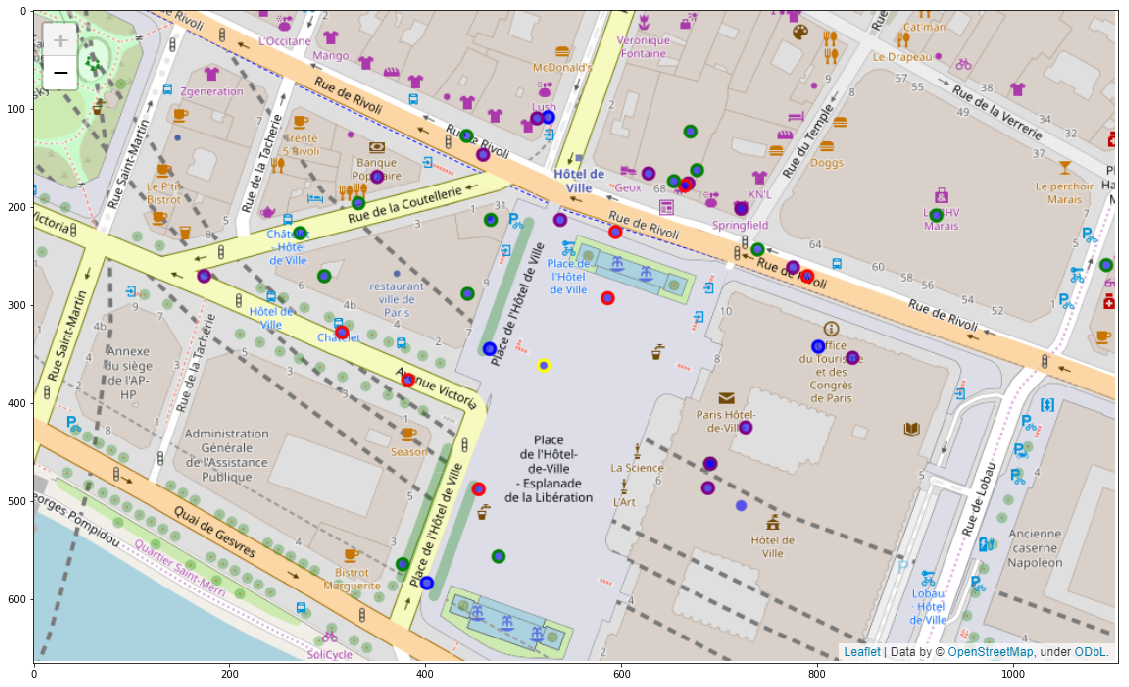

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,12))
img = mpimg.imread('./Images/Paris.PNG')
plt.imshow(img)

In [38]:
map_dubai = folium.Map(location=[d_latitude, d_longitude], zoom_start=13)

the_colour = ''
for lat, lng, label in zip(d_df['latitude'],d_df['longitude'],d_df['categories']):
    if label in Hotels:
        the_colour = 'yellow'
    elif label in Activities:
        the_colour = 'blue'
    elif label in Food:
        the_colour = 'green'
    elif label in Sight_seeing:
        the_colour = 'cyan'
    elif label in Travel:
        the_colour = 'red'
    elif label in Shopping:
        the_colour = 'purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=the_colour,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_dubai)

map_dubai

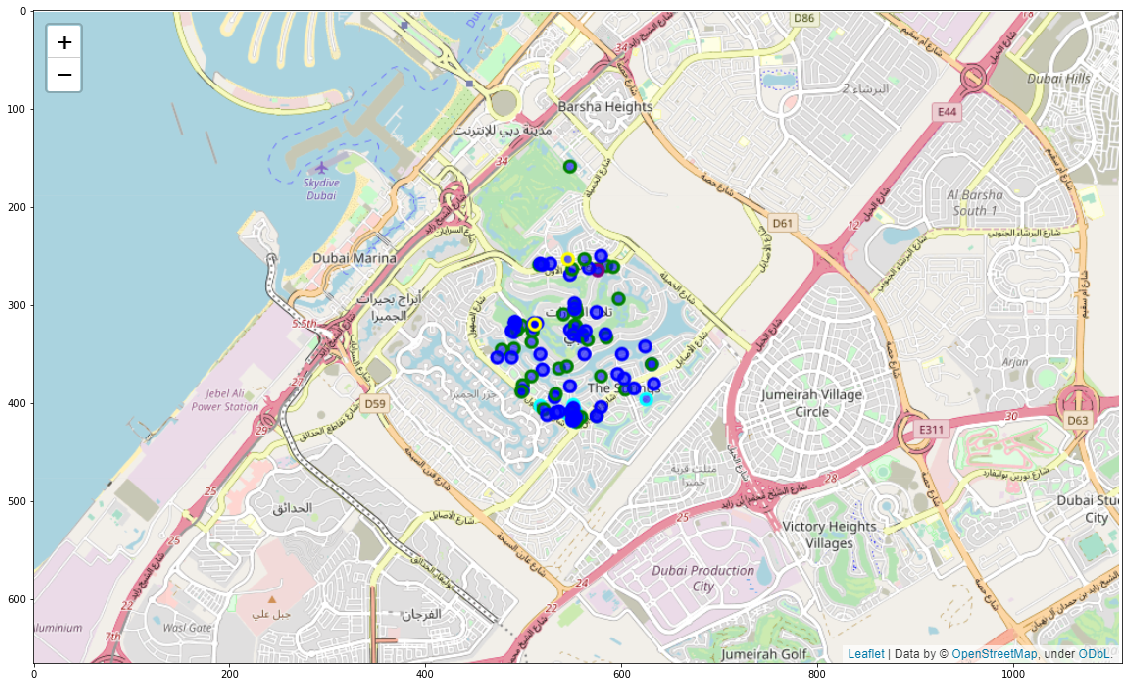

In [39]:
plt.figure(figsize=(20,12))
img = mpimg.imread('./Images/Dubai.PNG')
plt.imshow(img)

In [40]:
map_newyork = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=13)

the_colour = ''
for lat, lng, label in zip(ny_df['latitude'],ny_df['longitude'],ny_df['categories']):
    if label in Hotels:
        the_colour = 'yellow'
    elif label in Activities:
        the_colour = 'blue'
    elif label in Food:
        the_colour = 'green'
    elif label in Sight_seeing:
        the_colour = 'cyan'
    elif label in Travel:
        the_colour = 'red'
    elif label in Shopping:
        the_colour = 'purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=the_colour,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_newyork)

map_newyork

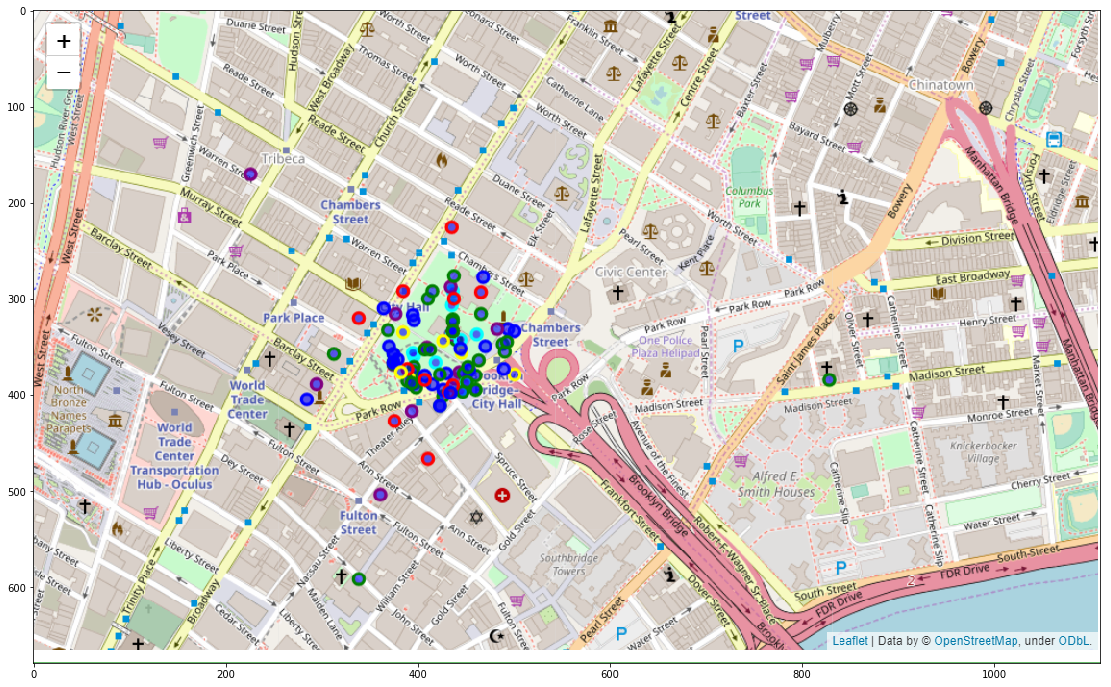

In [41]:
plt.figure(figsize=(20,12))
img = mpimg.imread('./Images/NewYork.PNG')
plt.imshow(img)

In [42]:
map_kuala = folium.Map(location=[kl_latitude, kl_longitude], zoom_start=13)

the_colour = ''
for lat, lng, label in zip(kl_df['latitude'],kl_df['longitude'],kl_df['categories']):
    if label in Hotels:
        the_colour = 'yellow'
    elif label in Activities:
        the_colour = 'blue'
    elif label in Food:
        the_colour = 'green'
    elif label in Sight_seeing:
        the_colour = 'cyan'
    elif label in Travel:
        the_colour = 'red'
    elif label in Shopping:
        the_colour = 'purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=the_colour,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_kuala)

map_kuala

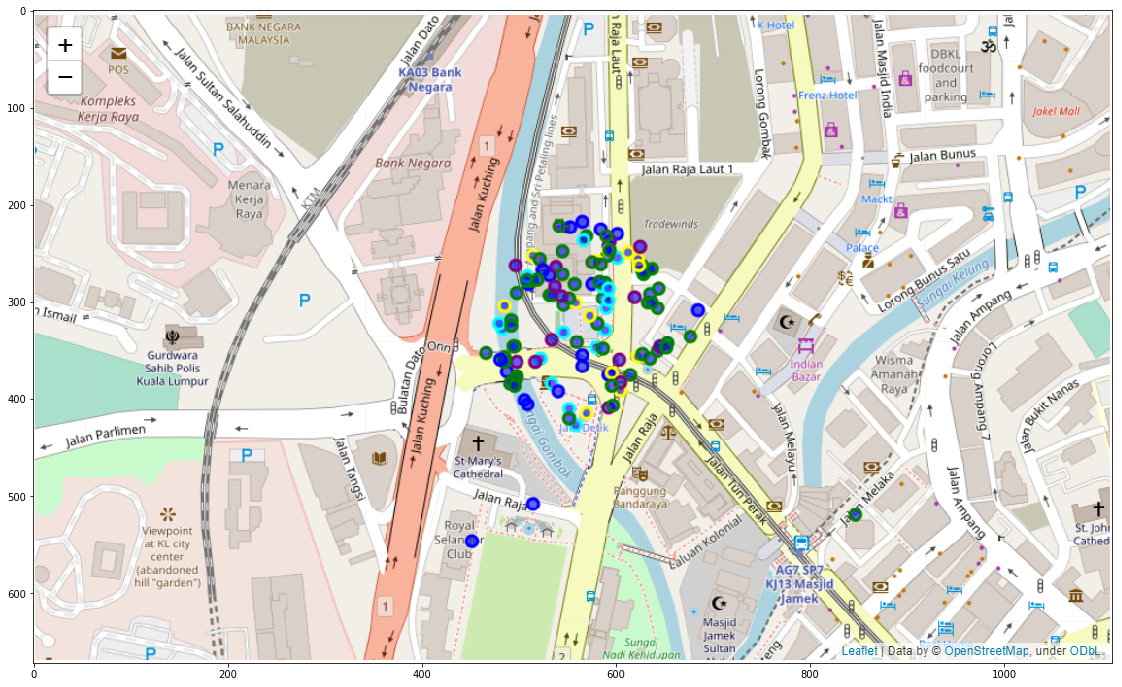

In [43]:
plt.figure(figsize=(20,12))
img = mpimg.imread('./Images/KualaLumpur.PNG')
plt.imshow(img)

### Putting our results in our dataframe for total Score

In [44]:
total = [0,0,0,0]
for i in range(4):
    total[i] += df.loc[i,'Category Count':].sum()
    df['Total'] = total
df

City  Category Count  Hotels  Activities  Food  Sight Seeing  \
0         Paris              26       1           2    11             2   
1  Kuala Lumpur              38       2           7    18             6   
2      New York              44       4           5    21             4   
3         Dubai              33       1          18    10             2   

   Travel  Shopping  Hotels Weighted  Activities Weighted  Food Weighted  \
0       4         6                6                   10             44   
1       0         5               12                   35             72   
2       6         4               24                   25             84   
3       0         2                6                   90             40   

   Sight Seeing Weighted  Travel Weighted  Shopping Weighted  \
0                      6                8                  6   
1                     18                0                  5   
2                     12               12                  4   
3                      6                0                  2   

   Weighted Category Count  Total  
0                       80    212  
1                      142    360  
2                      161    410  
3                      144    354

In [47]:
score = [0,0,0,0]
for i in range(4):
    score[i] = df.iloc[i]['Total']/df.iloc[i]['Category Count']
df['Score'] = score
df.sort_values(by = 'Score', ascending = False)

City  Category Count  Hotels  Activities  Food  Sight Seeing  \
3         Dubai              33       1          18    10             2   
1  Kuala Lumpur              38       2           7    18             6   
2      New York              44       4           5    21             4   
0         Paris              26       1           2    11             2   

   Travel  Shopping  Hotels Weighted  Activities Weighted  Food Weighted  \
3       0         2                6                   90             40   
1       0         5               12                   35             72   
2       6         4               24                   25             84   
0       4         6                6                   10             44   

   Sight Seeing Weighted  Travel Weighted  Shopping Weighted  \
3                      6                0                  2   
1                     18                0                  5   
2                     12               12                  4   
0                      6                8                  6   

   Weighted Category Count  Total      Score  
3                      144    354  10.727273  
1                      142    360   9.473684  
2                      161    410   9.318182  
0                       80    212   8.153846

In [49]:
df[['City','Score']].sort_values(by = 'Score', ascending = False)

City      Score
3         Dubai  10.727273
1  Kuala Lumpur   9.473684
2      New York   9.318182
0         Paris   8.153846

### The End